# Importing the necessary packages and modules

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from extract_dataframe import *
from clean_tweets_dataframe import *
from wordcloud import WordCloud

# Data Acquisition

We are going to use the downloaded data found a Documents/Tweet_Data_Analysis/Twitter-Data-Analysis-10Academy-Training/data/Economic_Twitter_Data.json. The data is going to be loaded into a dataframe using the exract_dataframe module

In [14]:
 tweets_len, tweet_list = read_json("data/Economic_Twitter_Data.json")

In [15]:
tweets_len     #check the length of the list

24625

In [16]:
tweet = TweetDfExtractor(tweet_list)
tweet_df = tweet.get_tweet_df(True)  #This creates the df and also saves it to a csv

File Successfully Saved.!!!


In [18]:
#confirm the loaded data
tweet_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,0.0,de,113,355,McMc74078966,3,12,None,[],"[{'screen_name': 'nikitheblogger', 'name': 'Ne...",None
1,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,0.0,de,113,505,McMc74078966,3,12,None,[],"[{'screen_name': 'sagt_mit', 'name': 'Sie sagt...",None
2,Fri Apr 22 22:17:28 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,0.0,de,113,4,McMc74078966,3,12,None,[],"[{'screen_name': 'Kryptonoun', 'name': 'Krypto...",None
3,Fri Apr 22 22:17:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,0.0,de,113,332,McMc74078966,3,12,None,"[{'text': 'Deutschen', 'indices': [16, 26]}, {...","[{'screen_name': 'WRi007', 'name': 'Wolfgang B...",None
4,Fri Apr 22 22:13:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @RolandTichy: Baerbock verkündet mal so neb...,0.0,0.0,de,113,386,McMc74078966,3,12,None,[],"[{'screen_name': 'RolandTichy', 'name': 'Rolan...",None


# Data Preprocessing
Data preprocessing will involve a series of steps to prepare the data for modelling. In this section, we will do data cleaning and text vectorization. In order to understand the data better and select the best attributes to use, we will 
include a step on data visualization and exploratory data analysis (EDA)

### Data Cleaning
We will first clean the dataframe created above using the Clean_Dataframe class from clean_dataframe.py

In [19]:
#clean the data
def cleanDataframe():
    """
    This function cleans a dataframe by dropping unwanted columns, drop duplicates, convert column in the dataframe to the correct data types,
    and remove Non-English tweets    
    """
    dfCleaner = Clean_Tweets(tweet_df)   #Clean_Tweets object to use for cleaning
    df = dfCleaner.df
    
    #df cleaning
    dfCleaner.df = dfCleaner.drop_unwanted_column(dfCleaner.df)    #drop unwanted columns
    dfCleaner.df = dfCleaner.drop_duplicate(dfCleaner.df)          #drop duplicates
    dfCleaner.df = dfCleaner.convert_to_datetime(dfCleaner.df)  #convert datetime columns
    dfCleaner.df = dfCleaner.convert_to_numbers(dfCleaner.df)    #convert the numeric columns to number
    dfCleaner.df = dfCleaner.remove_non_english_tweets(dfCleaner.df) #Remove Non-English tweets
    
    return dfCleaner.df

### Cleaning the dataframe

In [32]:
print("Length of unclean dataframe is:", len(tweet_df))

Length of unclean dataframe is: 24625


In [33]:
clean_tweet_df = cleanDataframe()
print("Length of clean dataframe is:", len(clean_tweet_df))

Automation in Action...!!!
Length of clean dataframe is: 16374


In [34]:
clean_tweet_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
38,2022-04-22 22:17:05,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.540000,en,12179,43,davideiacovozzi,18,55,None,"[{'text': 'gold', 'indices': [116, 121]}, {'te...","[{'screen_name': 'NorthstarCharts', 'name': 'N...",None
39,2022-04-22 13:44:53,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,0.15,0.175000,en,12179,32,davideiacovozzi,18,55,None,[],"[{'screen_name': 'MichaelAArouet', 'name': 'Mi...",None
41,2022-04-22 06:10:34,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,0.000000,en,12179,26,davideiacovozzi,18,55,None,[],"[{'screen_name': 'goldseek', 'name': 'Peter ⚒ ...",None
42,2022-04-21 17:22:09,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,0.00,0.183333,en,12179,213,davideiacovozzi,18,55,None,[],"[{'screen_name': 'charliebilello', 'name': 'Ch...",None
43,2022-04-21 10:32:26,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,-0.40,0.400000,en,12179,417,davideiacovozzi,18,55,None,[],"[{'screen_name': 'biancoresearch', 'name': 'Ji...",None


### Data Visualization and Exploratory Data Analysis

In this section, we are going to explore features of our data in order to understand it better. 
We are going to run statistical tests to the data to understand its features better and also generate various plots and 
visualizations of the data in order to understand it better.

#### Analysing polarities and subjectivities of tweets

<ol>
    <li>First, we will group the values of polarity into 3 categories. </li>
        <ul>
            <li>Tweets with a polarity value of greater than 0.5 we categorize them as <strong>positive</strong>.</li>
            <li>Tweets with a polarity value of less than 0.5 we categorize them as <strong>negative</strong>.</li>
            <li>The rest of the tweets with polarity of 0.5 we categorize them as <strong>neutral</strong>.</li>
            <li> We have defined a function <strong> polarity_categories()</strong> to do the grouping and will 
                apply it to the dataframe by a new column called <strong>polarity_category</strong></li>
        </ul>
    <li>We will then plot these <strong>polarity_categories</strong> in a pie chart to see the categories better </li>
    <li>We will then generate a scatter plot that indicates the actual tweet based on its polarity and 
        subjectivity value</li>
        <ul>
            <li>positive tweets will be indicated on the plot with green dots</li>
            <li>negative tweets will be indicated by red dots</li>
            <li>neutral tweets will be indicated by blue dots</li>
            <li>Subjectivity scale will indicate whether the tweet was based on factual information or the personal opinions
                of the person tweeting. Higher subjectivity values indicate that the tweet is based on personal opinion and 
                not facts <.li>
        </ul>
    
</ol>


In [49]:
def polarity_categories(polarity):
    """
    This function categorizes the polarities of each tweet.
    polarity value> 0.5 is positive
    polarity value< 0.5 is negative
    polarity value between 0 and 0.5 is neutral
    """
    if (polarity> 0.5):
        return "positive"
    
    elif (polarity< 0.5):
        return "negative"
    
    elif (polarity==0.5):
        return "neutral"

In [50]:
#Apply the function to the dataframe
clean_tweet_df["polarity_category"]= clean_tweet_df["polarity"].apply(polarity_categories)
clean_tweet_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,polarity_category
38,2022-04-22 22:17:05,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.540000,en,12179,43,davideiacovozzi,18,55,None,"[{'text': 'gold', 'indices': [116, 121]}, {'te...","[{'screen_name': 'NorthstarCharts', 'name': 'N...",None,negative
39,2022-04-22 13:44:53,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,0.15,0.175000,en,12179,32,davideiacovozzi,18,55,None,[],"[{'screen_name': 'MichaelAArouet', 'name': 'Mi...",None,negative
41,2022-04-22 06:10:34,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,0.000000,en,12179,26,davideiacovozzi,18,55,None,[],"[{'screen_name': 'goldseek', 'name': 'Peter ⚒ ...",None,negative
42,2022-04-21 17:22:09,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,0.00,0.183333,en,12179,213,davideiacovozzi,18,55,None,[],"[{'screen_name': 'charliebilello', 'name': 'Ch...",None,negative
43,2022-04-21 10:32:26,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,-0.40,0.400000,en,12179,417,davideiacovozzi,18,55,None,[],"[{'screen_name': 'biancoresearch', 'name': 'Ji...",None,negative


Text(0, 0.5, '')

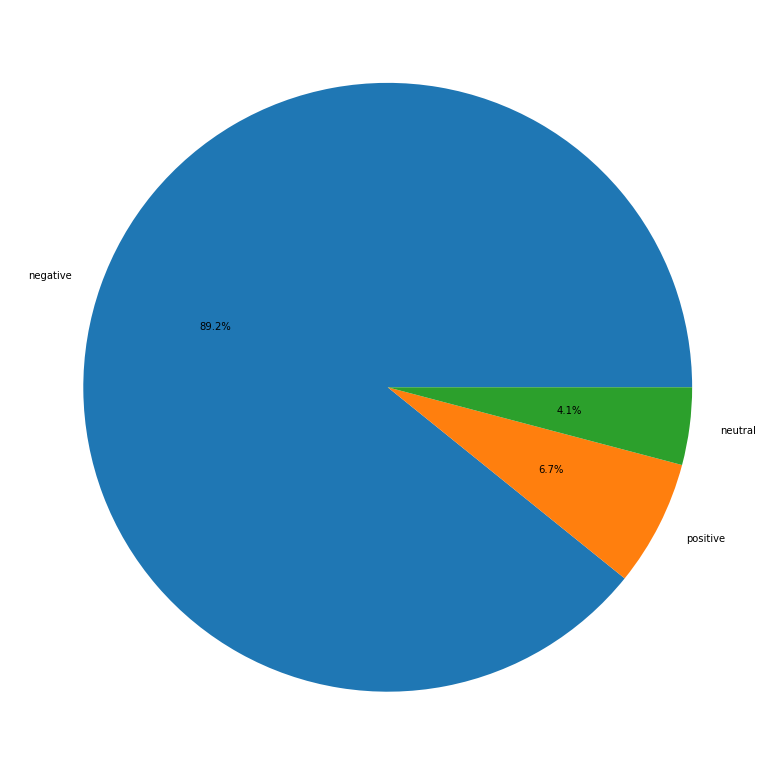

In [51]:
plt.rc('figure', figsize=(18, 14))    #change the size of the plots
clean_tweet_df['polarity_category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')

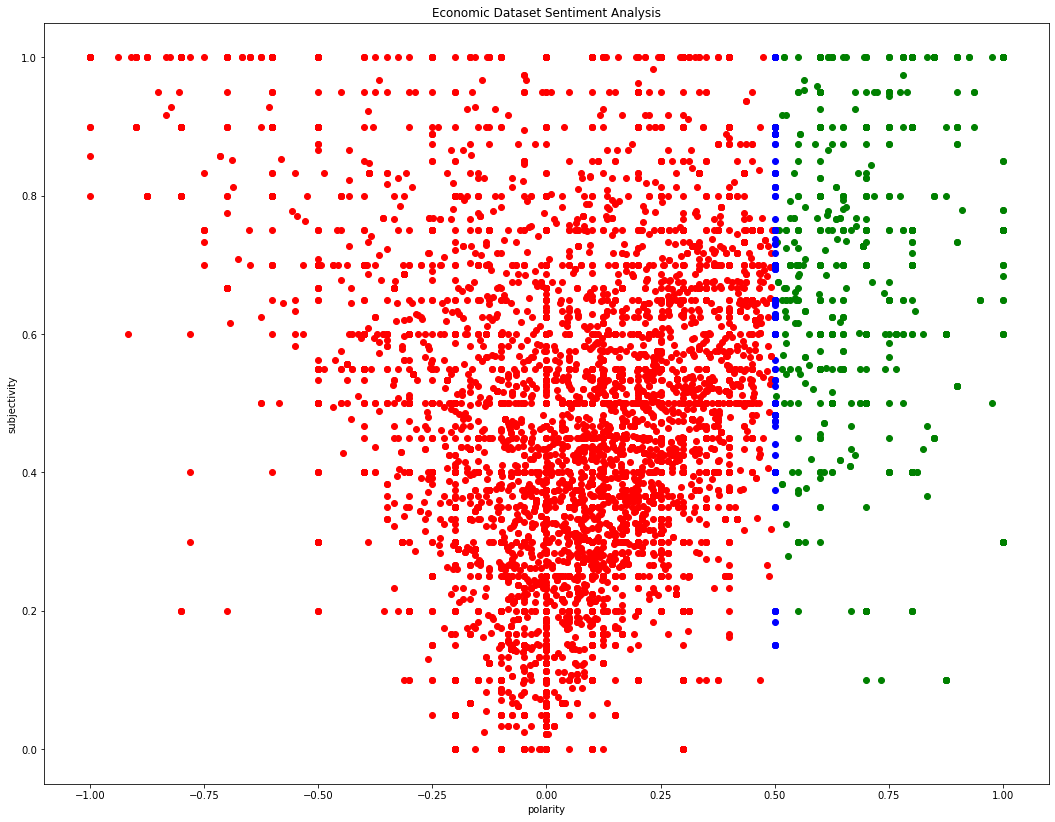

In [54]:
for index,row in clean_tweet_df.iterrows():
    if row['polarity_category']=='positive':
        plt.scatter(row['polarity'],row['subjectivity'],color='green')
    elif row['polarity_category']=='negative':
        plt.scatter(row['polarity'],row['subjectivity'],color='red')
    else:
        plt.scatter(row['polarity'],row['subjectivity'],color='blue')
plt.title('Economic Dataset Sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

#### Analysing most frequently used words in the tweets
We will use the <strong>WordCloud</strong> class from the <strong>wordcloud</strong> package to compute the most 
frequently used terms in the tweets. In the wordcloud diagram below, we can see that some of the most frequently used 
words in the tweets include: <em>Inflation, Russia, Ukraine, rate, China, support, market</em>

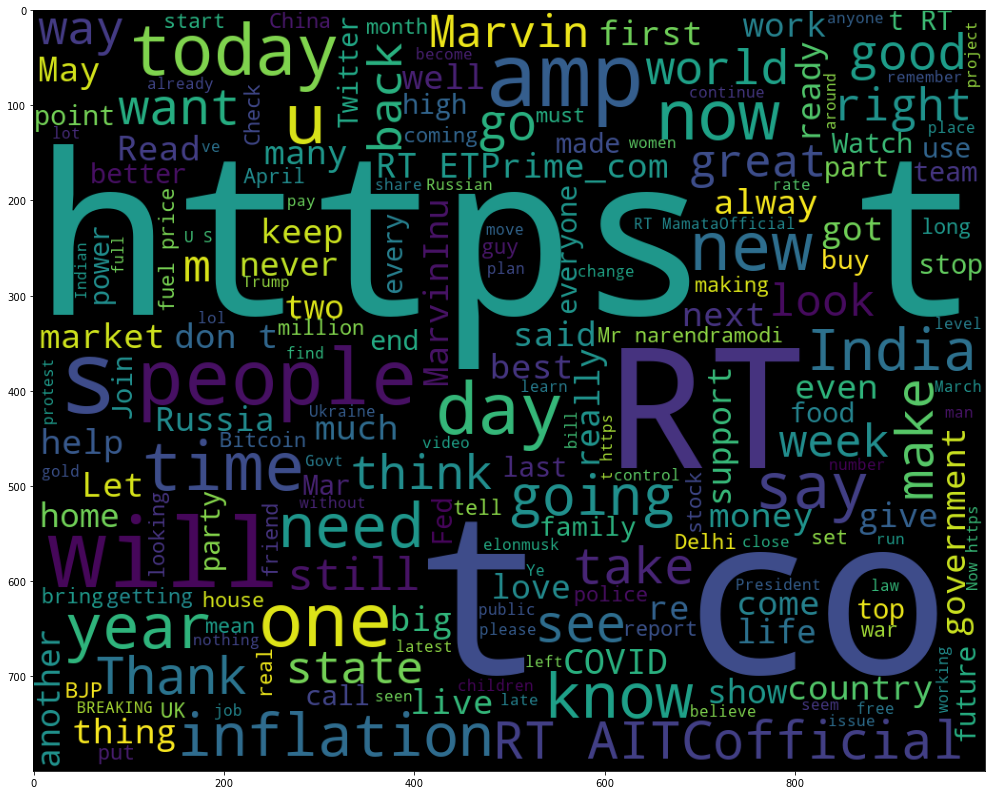

In [45]:
# Creating a word cloud
words = ' '.join([tweet for tweet in clean_tweet_df['original_text']])
wordCloud = WordCloud(width=1000, height=800).generate(words)

plt.imshow(wordCloud)
plt.show()

### Text Vectorization